In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Make plots a bit prettier
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)


In [2]:
# Cell 3: Download VADER lexicon for sentiment analysis (only first time)
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


In [3]:
df=pd.read_csv('../data/processed/reviews_processed.csv')
df.head()

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,ba01d6b7-97fe-4376-b68c-817f397c00af,I can't access the loan in the app. only it wo...,3,2025-11-28,2025,11,Awash,Awash Bank,FAHMI SHEMSEDIN,0,56,Google Play
1,bde60e8b-0b05-4c88-9f60-c14c18fa57b9,no one from all ethiopian bank keep it up nice,5,2025-11-28,2025,11,Awash,Awash Bank,Zed Cherinet,0,46,Google Play
2,fae55af8-1c5a-41f5-b6e8-55652afbf303,thenk you ✍️🙏,5,2025-11-26,2025,11,Awash,Awash Bank,dechasa leta,0,13,Google Play
3,e35ece9f-a9fb-4510-a9e3-8b8487a99d12,i hope to be good app,5,2025-11-24,2025,11,Awash,Awash Bank,Mulubirhan Yikunom,0,21,Google Play
4,fb9ed669-ea1d-4eb5-a336-634ccc59e265,amazing 😍😍,5,2025-11-23,2025,11,Awash,Awash Bank,Mifta Raya,0,10,Google Play


In [4]:

def rating_to_label(r):
    if r <= 2:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment_label"] = df["rating"].apply(rating_to_label)
df


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label
0,ba01d6b7-97fe-4376-b68c-817f397c00af,I can't access the loan in the app. only it wo...,3,2025-11-28,2025,11,Awash,Awash Bank,FAHMI SHEMSEDIN,0,56,Google Play,neutral
1,bde60e8b-0b05-4c88-9f60-c14c18fa57b9,no one from all ethiopian bank keep it up nice,5,2025-11-28,2025,11,Awash,Awash Bank,Zed Cherinet,0,46,Google Play,positive
2,fae55af8-1c5a-41f5-b6e8-55652afbf303,thenk you ✍️🙏,5,2025-11-26,2025,11,Awash,Awash Bank,dechasa leta,0,13,Google Play,positive
3,e35ece9f-a9fb-4510-a9e3-8b8487a99d12,i hope to be good app,5,2025-11-24,2025,11,Awash,Awash Bank,Mulubirhan Yikunom,0,21,Google Play,positive
4,fb9ed669-ea1d-4eb5-a336-634ccc59e265,amazing 😍😍,5,2025-11-23,2025,11,Awash,Awash Bank,Mifta Raya,0,10,Google Play,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,b3c8405c-96a7-4b5e-884c-76c97c530c34,good,5,2025-05-09,2025,5,Dashen,Dashen Bank,fenta abebayehu,1,4,Google Play,positive
1196,e1c1214a-8bc1-45db-bc49-3d51dddc6b88,Amazing app super easy to use and best design....,5,2025-05-09,2025,5,Dashen,Dashen Bank,Yitbarek Gossaye,1,56,Google Play,positive
1197,8d1d472b-2bae-4749-b089-5632108ade02,its the best ever,5,2025-05-09,2025,5,Dashen,Dashen Bank,natnael abera,1,17,Google Play,positive
1198,749851ed-72d7-4f1c-8e5e-27dd822b5008,nice,5,2025-05-08,2025,5,Dashen,Dashen Bank,Mehammed Amin,1,4,Google Play,positive


In [5]:

df["clean_text"] = df["review_text"].str.lower()
df[["review_text", "clean_text"]]


,review_text,clean_text
0,I can't access the loan in the app. only it wo...,i can't access the loan in the app. only it wo...
1,no one from all ethiopian bank keep it up nice,no one from all ethiopian bank keep it up nice
2,thenk you ✍️🙏,thenk you ✍️🙏
3,i hope to be good app,i hope to be good app
4,amazing 😍😍,amazing 😍😍
...,...,...
1195,good,good
1196,Amazing app super easy to use and best design....,amazing app super easy to use and best design....
1197,its the best ever,its the best ever
1198,nice,nice


Frequency-based representation (Bag of Words)

In [6]:

count_vec = CountVectorizer(stop_words="english")
X_counts = count_vec.fit_transform(df["clean_text"])

# Sum counts for each word across all documents
word_counts = np.asarray(X_counts.sum(axis=0)).flatten()
vocab = np.array(count_vec.get_feature_names_out())

freq_df = pd.DataFrame({"word": vocab, "count": word_counts})
freq_df = freq_df.sort_values("count", ascending=False)
freq_df.head(10)


,word,count
111,app,414
630,good,245
202,best,113
171,bank,110
941,nice,66
173,banking,64
1424,use,64
531,fast,46
368,dashen,46
805,like,43


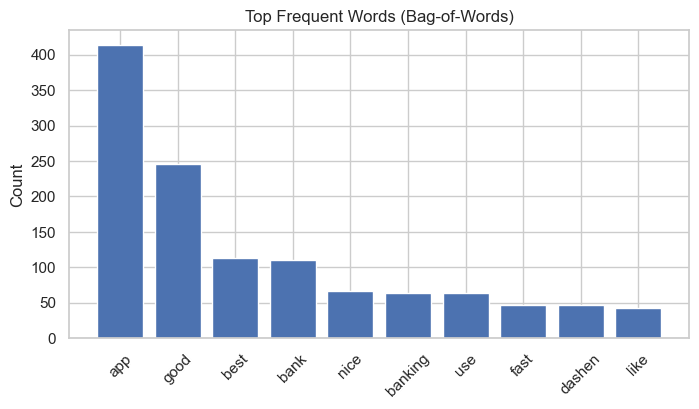

In [7]:

top_n = 10
top_freq = freq_df.head(top_n)

plt.bar(top_freq["word"], top_freq["count"])
plt.xticks(rotation=45)
plt.title("Top Frequent Words (Bag-of-Words)")
plt.ylabel("Count")
plt.show()


TF-IDF representation

In [8]:
tfidf_vec = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf_vec.fit_transform(df["clean_text"])

# Get average TF-IDF score per word across documents
tfidf_means = np.asarray(X_tfidf.mean(axis=0)).flatten()
vocab_tfidf = np.array(tfidf_vec.get_feature_names_out())

tfidf_df = pd.DataFrame({"word": vocab_tfidf, "tfidf": tfidf_means})
tfidf_df = tfidf_df.sort_values("tfidf", ascending=False)
tfidf_df.head(10)


,word,tfidf
630,good,0.146462
111,app,0.084258
202,best,0.056285
941,nice,0.044273
171,bank,0.024557
501,excellent,0.023185
1505,wow,0.019650
531,fast,0.018407
90,amazing,0.016695
1424,use,0.014964


Compare TF-IDF vs raw frequency

In [9]:

print("Top 10 by raw frequency:")
display(freq_df.head(10))

print("\nTop 10 by TF-IDF (words more unique / informative):")
display(tfidf_df.head(10))


Top 10 by raw frequency:


,word,count
111,app,414
630,good,245
202,best,113
171,bank,110
941,nice,66
173,banking,64
1424,use,64
531,fast,46
368,dashen,46
805,like,43



Top 10 by TF-IDF (words more unique / informative):


,word,tfidf
630,good,0.146462
111,app,0.084258
202,best,0.056285
941,nice,0.044273
171,bank,0.024557
501,excellent,0.023185
1505,wow,0.019650
531,fast,0.018407
90,amazing,0.016695
1424,use,0.014964


Topic Modeling (LDA)

In [10]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# Tokenize text (very simple split for demo)
df["tokens"] = df["clean_text"].str.split()

# Create dictionary and corpus for LDA
dictionary = Dictionary(df["tokens"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens"]]


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (only first time)                                                                                                                
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
# Remove stopwords from your tokenized text
df["tokens_nostop"] = df["tokens"].apply(
    lambda words: [w for w in words if w not in stop_words]
)

df[["clean_text", "tokens", "tokens_nostop"]].head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_text,tokens,tokens_nostop
0,i can't access the loan in the app. only it wo...,"[i, can't, access, the, loan, in, the, app., o...","[can't, access, loan, app., work, ussd]"
1,no one from all ethiopian bank keep it up nice,"[no, one, from, all, ethiopian, bank, keep, it...","[one, ethiopian, bank, keep, nice]"
2,thenk you ✍️🙏,"[thenk, you, ✍️🙏]","[thenk, ✍️🙏]"
3,i hope to be good app,"[i, hope, to, be, good, app]","[hope, good, app]"
4,amazing 😍😍,"[amazing, 😍😍]","[amazing, 😍😍]"


In [12]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
# Use stopword-cleaned tokens
dictionary = Dictionary(df["tokens_nostop"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens_nostop"]]


lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,
    passes=10,
    random_state=42
)


In [13]:
topics = lda_model.show_topics(num_topics=2, num_words=10, formatted=False)

for i, topic in topics:
    print(f"\n--- Topic {i+1} ---")
    for word, weight in topic:
        print(f"{word:15s}  weight={weight:.4f}")



--- Topic 1 ---
app              weight=0.0384
best             weight=0.0246
bank             weight=0.0109
banking          weight=0.0096
like             weight=0.0095
working          weight=0.0061
use              weight=0.0049
new              weight=0.0048
ever             weight=0.0048
even             weight=0.0046

--- Topic 2 ---
good             weight=0.0547
app              weight=0.0417
nice             weight=0.0150
bank             weight=0.0097
one              weight=0.0087
use              weight=0.0077
excellent        weight=0.0074
dashen           weight=0.0072
fast             weight=0.0067
easy             weight=0.0064


Part-of-Speech Tagging (Noun Extraction)

In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == "NOUN"]

df["nouns"] = df["review_text"].apply(extract_nouns)
df[["review_text", "nouns"]]

,review_text,nouns
0,I can't access the loan in the app. only it wo...,"[loan, app, USSD]"
1,no one from all ethiopian bank keep it up nice,"[one, bank]"
2,thenk you ✍️🙏,[]
3,i hope to be good app,[app]
4,amazing 😍😍,[]
...,...,...
1195,good,[]
1196,Amazing app super easy to use and best design....,"[app, design]"
1197,its the best ever,[]
1198,nice,[]


TextBlob sentiment

In [16]:
# Polarity in [-1, 1], subjectivity in [0, 1]

# Get polarity and subjectivity
df["tb_polarity"] = df["review_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["tb_subjectivity"] = df["review_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert polarity → sentiment label
def polarity_to_label(p):
    if p > 0.1:
        return "positive"
    elif p < -0.1:
        return "negative"
    else:
        return "neutral"

df["tb_sentiment"] = df["tb_polarity"].apply(polarity_to_label)

# Show output
df[["review_text", "rating", "tb_polarity", "tb_subjectivity", "tb_sentiment"]]


,review_text,rating,tb_polarity,tb_subjectivity,tb_sentiment
0,I can't access the loan in the app. only it wo...,3,0.000000,1.0,neutral
1,no one from all ethiopian bank keep it up nice,5,0.600000,1.0,positive
2,thenk you ✍️🙏,5,0.000000,0.0,neutral
3,i hope to be good app,5,0.700000,0.6,positive
4,amazing 😍😍,5,0.600000,0.9,positive
...,...,...,...,...,...
1195,good,5,0.700000,0.6,positive
1196,Amazing app super easy to use and best design....,5,0.613333,0.7,positive
1197,its the best ever,5,1.000000,0.3,positive
1198,nice,5,0.600000,1.0,positive


VADER Sentiment

In [17]:
# VADER is optimized for reviews, slang, emojis, and short texts

def vader_compound(text):
    return sia.polarity_scores(text)["compound"]

# VADER compound score
df["vader_compound"] = df["review_text"].apply(vader_compound)

def vader_label(c):
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"

df["vader_sentiment"] = df["vader_compound"].apply(vader_label)

# Show output
df[["review_text", "rating", "tb_polarity", "vader_compound", "vader_sentiment"]]


,review_text,rating,tb_polarity,vader_compound,vader_sentiment
0,I can't access the loan in the app. only it wo...,3,0.000000,0.0000,neutral
1,no one from all ethiopian bank keep it up nice,5,0.600000,0.1531,positive
2,thenk you ✍️🙏,5,0.000000,0.0000,neutral
3,i hope to be good app,5,0.700000,0.7003,positive
4,amazing 😍😍,5,0.600000,0.5859,positive
...,...,...,...,...,...
1195,good,5,0.700000,0.4404,positive
1196,Amazing app super easy to use and best design....,5,0.613333,0.9623,positive
1197,its the best ever,5,1.000000,0.6369,positive
1198,nice,5,0.600000,0.4215,positive


visualization of lexicon scores vs rating

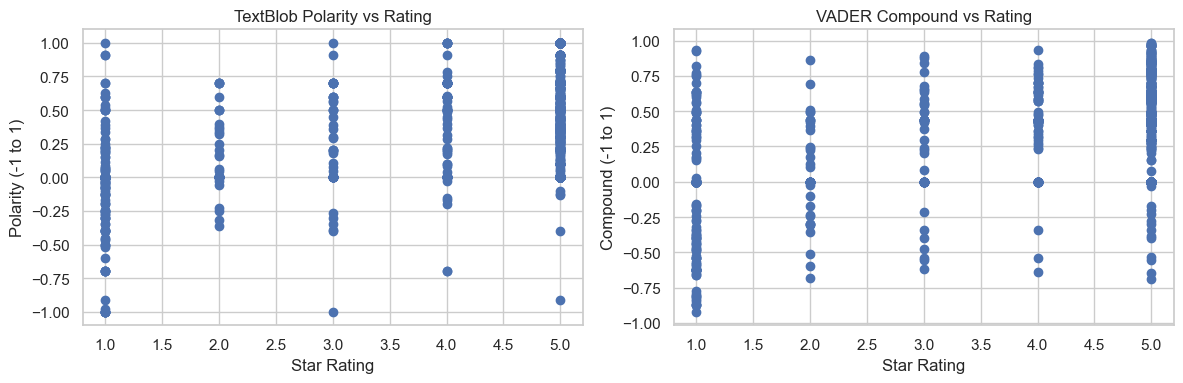

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df["rating"], df["tb_polarity"])
axes[0].set_title("TextBlob Polarity vs Rating")
axes[0].set_xlabel("Star Rating")
axes[0].set_ylabel("Polarity (-1 to 1)")

axes[1].scatter(df["rating"], df["vader_compound"])
axes[1].set_title("VADER Compound vs Rating")
axes[1].set_xlabel("Star Rating")
axes[1].set_ylabel("Compound (-1 to 1)")

plt.tight_layout()
plt.show()
